In [13]:
%matplotlib inline
import pandas as pd
import numpy as np

In [11]:
rating = pd.read_csv('jester-data-1.csv', header=None)
rating.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [14]:
rating = rating.replace(99, np.nan)

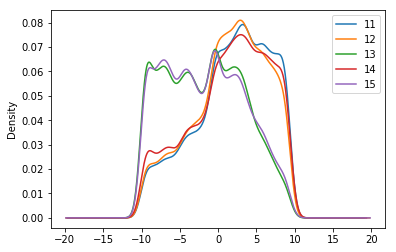

In [25]:
rating[[11, 12, 13, 14, 15]].plot(kind='kde')

In [27]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [49]:
# this is the size of our encoded representations
encoding_dim = 16

# this is our input placeholder
x = Input(shape=(100,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(x)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(100, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(x, decoded)

In [50]:
# this model maps an input to its encoded representation
encoder = Model(x, encoded)

In [51]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [52]:
autoencoder.compile(optimizer='adadelta', loss='mean_absolute_error')

In [53]:
without_counts = rating.as_matrix()[:, 1:]

In [54]:
# normalize between 0 and 1
normed_data = (without_counts + 10.01) / 20.01

In [55]:
normed_data = np.nan_to_num(normed_data)

In [56]:
np.random.shuffle(normed_data)
training, test = normed_data[:20000,:], normed_data[20000:,:]

In [74]:
from keras.callbacks import TensorBoard

In [76]:
autoencoder.fit(training, training,
                epochs=100,
                batch_size=256,
                validation_data=(test, test),
                callbacks=[TensorBoard(log_dir='tmp')])

Train on 20000 samples, validate on 4983 samples
Epoch 1/100
20000/20000 [==============================] - 0s - loss: 0.1207 - val_loss: 0.1204
Epoch 2/100
20000/20000 [==============================] - 0s - loss: 0.1206 - val_loss: 0.1203
Epoch 3/100
20000/20000 [==============================] - 0s - loss: 0.1205 - val_loss: 0.1202
Epoch 4/100
20000/20000 [==============================] - 0s - loss: 0.1204 - val_loss: 0.1202
Epoch 5/100
20000/20000 [==============================] - 0s - loss: 0.1203 - val_loss: 0.1200
Epoch 6/100
20000/20000 [==============================] - 0s - loss: 0.1202 - val_loss: 0.1200
Epoch 7/100
20000/20000 [==============================] - 0s - loss: 0.1201 - val_loss: 0.1199
Epoch 8/100
20000/20000 [==============================] - 0s - loss: 0.1201 - val_loss: 0.1198
Epoch 9/100
20000/20000 [==============================] - 0s - loss: 0.1200 - val_loss: 0.1197
Epoch 10/100
20000/20000 [==============================] - 0s - loss: 0.1199 - val_los

In [78]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(test)
decoded_imgs = decoder.predict(encoded_imgs)

In [79]:
# get sparsity of hidden layer
encoded_imgs.mean()

2.8649666

In [80]:
import matplotlib.pyplot as plt

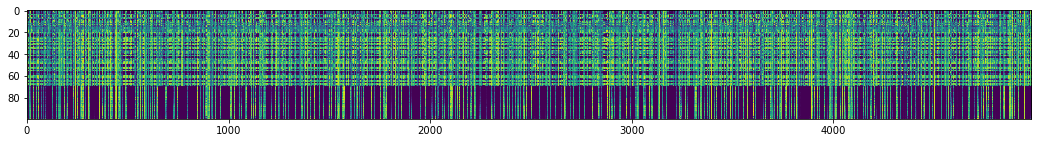

In [81]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(decoded_imgs.transpose(), aspect='auto')

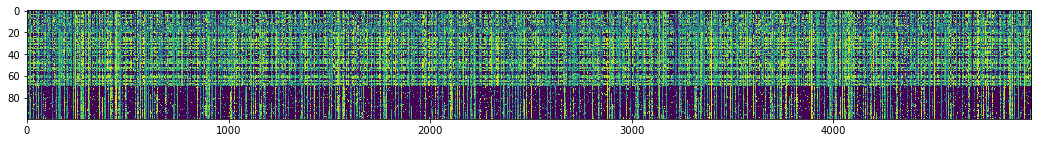

In [82]:
fig, ax = plt.subplots(figsize=(18, 2))
plt.imshow(test.transpose(), aspect='auto')